## Problem Set 1 on Pracitcing KNN by Hand

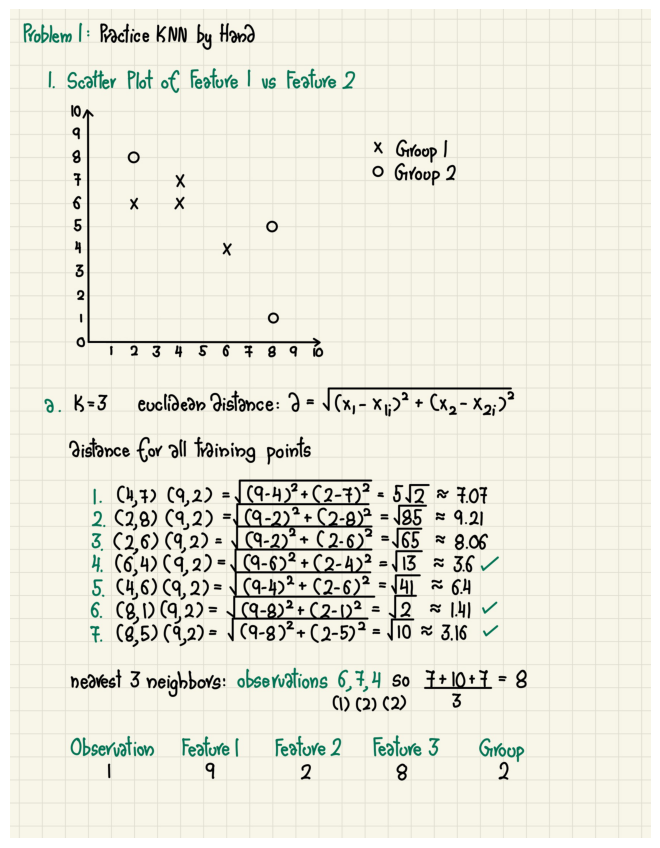

In [29]:

# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# load the image
img = mpimg.imread('C:/GitHub/Semester 5/TheoryOfMachineLearning/5_week-five/pset/images/Machine Learning-13.jpg')  

# display the image
plt.figure(figsize=(8.27, 11.69))
plt.imshow(img)
plt.axis('off')
plt.show()

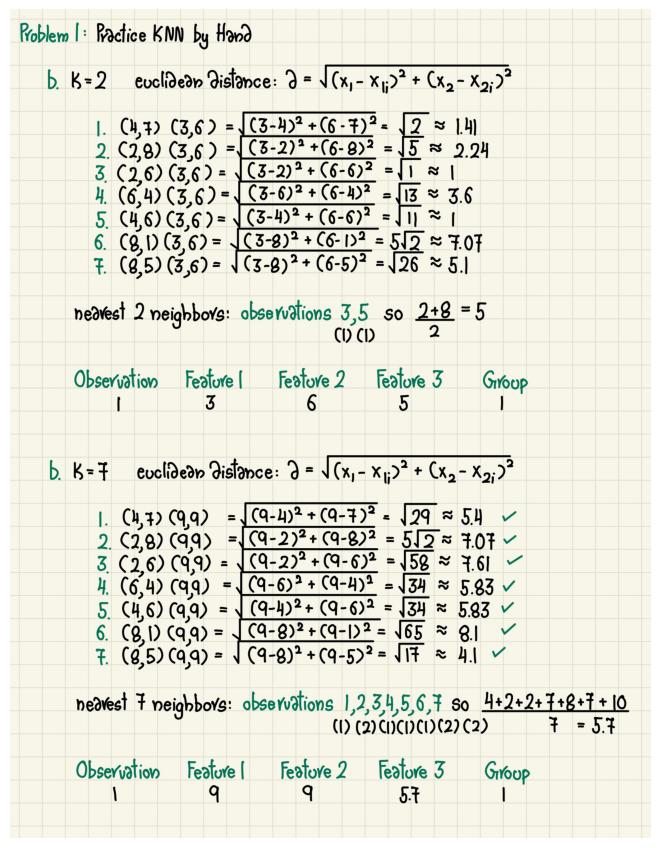

In [30]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# load the image
img = mpimg.imread('C:/GitHub/Semester 5/TheoryOfMachineLearning/5_week-five/pset/images/Machine Learning-14.jpg')  

# display the image
plt.figure(figsize=(8.27, 11.69))
plt.imshow(img)
plt.axis('off')
plt.show()

## Problem Set 2 on KNN & Bias-Variance Trade Off
A model's error can be broken down into variance, bias and irreducible error. This is explained better as such below:
- **Bias:** it is the error from overly simple assumptions
- **Variance:** it is where the model begins overfitting
- **Irreducible:** this is the error that refers to the noise that exists in the data itself

High bias models underfit and high variance models overfit, where they perform well on the training data but poorly on new data. There is a tradeoff between the bias and variance. The tradeoff is that increasing model complexity reduces bias but increase variance. Decreasing the complexity reduces the variance but increases bias.

**Question 1:** How do you expect the complexity of a KNN classifier to change if k increases? In other words, as we increase k, will the decision boundary become simpler and smoother or will it have more angles and curves?

**Answer 1:** as the k value increases in a KNN classifier, the classifier becomes less sensitive to the inidividual data points and noise. As a result, the decision boundary becomes simpler and smoother. With a small k, the boundary becomes all jagged and follows the training data. But when the k becomes big, the model generalizes more and may start to overfit when k becomes too large.

In [ ]:
"""

    1. load diabetes.csv and extract the feature matrix X and label vector y
    2. instantiate the KNN classifier
    3. evaluating the model using cross-validation into 5 folds and finding average

"""


# importing required libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate


# reading the dataframe and instantiating the X and y
diabetes_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/5_week-five/pset/data/diabetes.csv")
X = diabetes_df.drop(columns=['Outcome']).values
y = diabetes_df['Outcome'].values

# instantiating the KNN classifier
knn = KNeighborsClassifier()

# cross fold validation
cv = cross_validate(knn, X, y, cv=5, return_train_score=True)

# averaging the train and test scores
print("Number of Training Scores:", len(cv['train_score']))
print("Number of Testing Scores:", len(cv['test_score']))
average_train = cv['train_score'].mean()
average_test = cv['test_score'].mean()






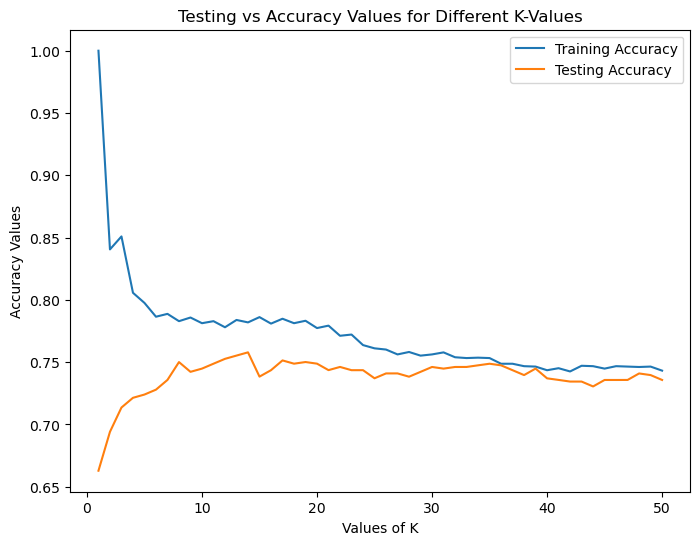

In [16]:

"""

    1. repeat but vary k from 1 to 50. for each value of k, find the average accuracy and testing score
        a. next, plot two lines, one showing how training accuracy changes with k and other with how testing changes with k

"""

# importing libraries
import matplotlib.pyplot as plt

# k values from 1 to 50
k_values = [k for k in range(1, 51)]

# instantiating empty lists
train_list = []
test_list = []

# looping through the k values
for k in k_values:
    # instantiating the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # cross fold validation
    cv = cross_validate(knn, X, y, cv=5, return_train_score=True)

    # averaging the train and test scores
    average_train = cv['train_score'].mean()
    train_list.append(average_train)
    average_test = cv['test_score'].mean()
    test_list.append(average_test)


# plotting the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, train_list, label='Training Accuracy')
plt.plot(k_values, test_list, label='Testing Accuracy')
plt.xlabel("Values of K")
plt.ylabel("Accuracy Values")
plt.title("Testing vs Accuracy Values for Different K-Values")
plt.legend()
plt.show()



**Question 6:** Can you spot where the model has high variance (overfitting) and where it has low variance?

**Answer 6:** The model has a high variance and is overfitting when the values of k are from 0 to 10, as there is a high training accuracy score but low testing accuracy score. A low variance occurs when when values of k is from 40 to 50, as the training accuracy drops and is close to the testing accuracy. 

## Problem Set 3 on Curse of Dimensionality

**Answer to Question 1, 2, 3**: in a 1 dimensional space, we find that by dividing the area by total area, which would be l. For a two dimensional space, we get l^2 / 1 and in a three dimensional space we get l^3 by 1. As a result, the pattern is l^p where p is the number of features. 


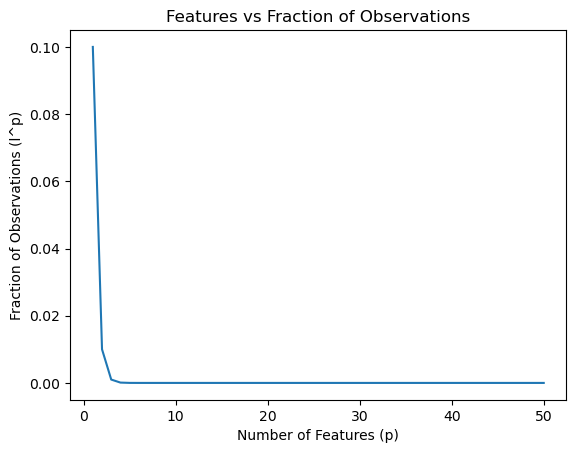

In [ ]:

"""

    1. assuming that l = 0.1, we observe the the fraction of available observations used in prediction change with p

"""

# importing required libraries
import matplotlib.pyplot as plt

# p values and comuting the fractions
l = 0.1
p_values = [p for p in range(1, 51)]
fractions = [l**p for p in p_values]

# plotting
plt.plot(p_values, fractions)
plt.xlabel("Number of Features (p)")
plt.ylabel("Fraction of Observations (l^p)")
plt.title("Features vs Fraction of Observations")
plt.show()



**Answer to Question 4:** From the plot given above, we observe that as the number of features go up, the fraction of observations near a query point decreases exponentially. As a result, in a high dimensional space, there are very few observations that are close to each other. Hence, as when p grows, the number of points near a query point shrinks a lot. We can therefore argue that a disadvantage of KNN is when a p is large, there are few observations that are close to a new data point due to the curse of dimensionality. We can express the fraction of observations used as prediction for k/N, where k is the number of nearest neighbors and N is the total number of observations. Hence, for a hypercube of side length l = 0.1 in p dimensions, the fraction is k / N = l^p. With regards to observations required for k=10 and neighbors N=10, this means the number of observations are 10 / 0.1^p.

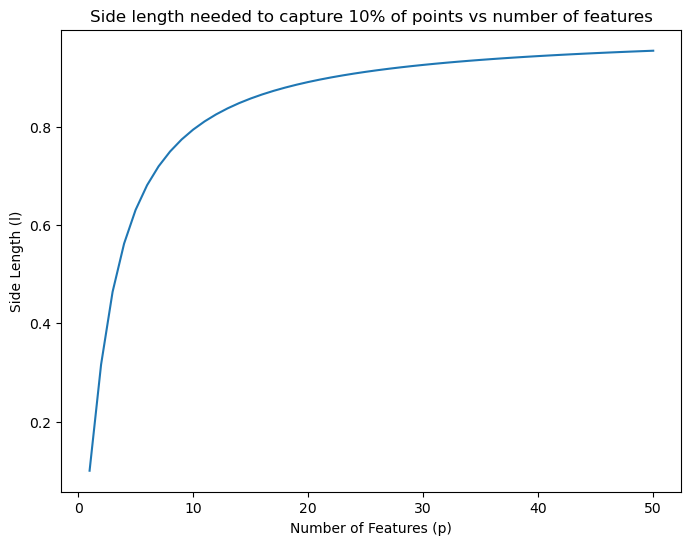

In [ ]:

# importing required libraries
import numpy as np

# the required computations
f = 0.1
p_values = np.arange(1, 51) 
side_lengths = f**(1/p_values) 

# the plotting
plt.figure(figsize=(8,6))
plt.plot(p_values, side_lengths)
plt.xlabel("Number of Features (p)")
plt.ylabel("Side Length (l)")
plt.title("Side length needed to capture 10% of points vs number of features")
plt.show()



**Answer to Question 5:** we can see that for a small value of p, the side length is extremely small. As the p increases, the side length also increases to capture the same fraction of points. As p grows, the hypercube grows very large to include 10% of points. As a results, the points that would otherwise be considered as neighbors would be too far away. As a result the KNN model might consider those very distant points as neighbors even though they're not similar to the query point, hence reducing the prediction accuracy. 